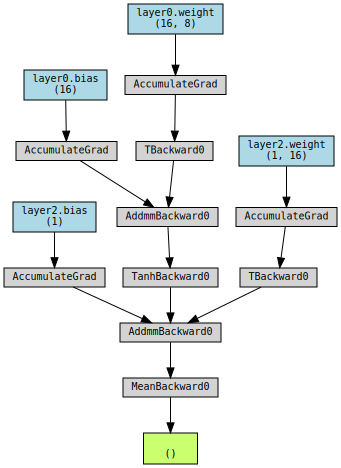

In [27]:
from collections import OrderedDict
import torch
from torch import nn
from torchviz import make_dot

model = nn.Sequential(OrderedDict([('layer0', nn.Linear(8, 16)), ('tanh1', nn.Tanh()), ('layer2', nn.Linear(16, 1))]))
# model.add_module('layer0', nn.Linear(8, 16))
# model.add_module('tanh1', nn.Tanh())
# model.add_module('layer2', nn.Linear(16, 1))
 
x = torch.randn(3, 8)
y = model(x)
make_dot(y.mean(), params=dict(model.named_parameters()))


In [28]:
[*model.named_parameters()]

[('layer0.weight',
  Parameter containing:
  tensor([[-0.2427,  0.1368,  0.0334, -0.0622,  0.0208,  0.0816,  0.3512, -0.2638],
          [ 0.1980,  0.1197, -0.3301, -0.2432,  0.3047, -0.0064,  0.1361, -0.2675],
          [ 0.2060,  0.3169,  0.0620,  0.2463, -0.0996,  0.0486, -0.1650,  0.3443],
          [ 0.0618, -0.1365, -0.1866, -0.0650, -0.1032,  0.1354,  0.2953, -0.1491],
          [-0.3308,  0.1028, -0.1325, -0.2588, -0.1739, -0.0646,  0.0315, -0.1946],
          [-0.2503, -0.3143,  0.0300,  0.1224,  0.0147,  0.2482, -0.2285, -0.0274],
          [ 0.1597, -0.0169, -0.1314,  0.2545, -0.1521, -0.2249, -0.0827, -0.2671],
          [ 0.0526, -0.0022,  0.0533,  0.3380, -0.3368,  0.1764, -0.2641,  0.3059],
          [-0.0929, -0.1148, -0.3213, -0.0183, -0.0150,  0.1247,  0.2996, -0.0980],
          [-0.1644,  0.0785, -0.2845,  0.0775, -0.2397,  0.2604,  0.2131,  0.0567],
          [ 0.2027,  0.3072,  0.1594,  0.3312, -0.3030, -0.2563, -0.2812, -0.2151],
          [ 0.2636,  0.3386,  0.2

In [ ]:
[*model.children()]

In [ ]:
for name, child in model.named_children():
# for name, child in model.children():
    print(f"module name: {name}")
    # for p in child.parameters():
    for param_name, p in child.named_parameters():
        print(f"param name: {param_name}")
        print(p)

In [ ]:
[*model.modules()]

In [ ]:
[*model.named_modules()]

In [ ]:
model.get_submodule("layer0")

In [2]:
print(model)

Sequential(
  (layer0): Linear(in_features=8, out_features=16, bias=True)
  (tanh1): Tanh()
  (layer2): Linear(in_features=16, out_features=1, bias=True)
)


In [13]:
[*model.parameters()][0].data.size()

torch.Size([16, 8])

In [19]:
x = torch.nn.Parameter(torch.randn(4, 5), requires_grad=True)
y = x ** 2
y

tensor([[2.9656e-01, 1.2381e-02, 7.8594e-01, 3.4944e+00, 4.0033e-01],
        [7.5009e-03, 5.6619e-02, 6.8678e-01, 1.1416e+00, 8.6584e-01],
        [3.5750e+00, 1.7331e+00, 5.3855e-01, 7.9024e-02, 3.2669e+00],
        [3.8308e-01, 2.1974e+00, 3.8292e-04, 1.0081e-01, 2.3529e-01]],
       grad_fn=<PowBackward0>)

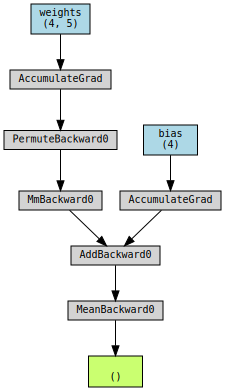

In [20]:
weight = torch.nn.Parameter(torch.randn(4, 5),
                                         requires_grad=True)
b = torch.nn.Parameter(torch.randn(4),
                                         requires_grad=True)
x = torch.randn(1, 5)
y = x @ weight.T + b
make_dot(y.mean(), params={"weights":weight, "bias": b})


In [22]:
### OOP: class, inheritance, abstraction, polymorphism, encaplsulation

class A:

    def __init__(self, name) -> None:
        self.name = name


    def gholam(self):
        print(self.name)

a = A("Gholam")
a.gholam()

Gholam


In [23]:
class B(A):
    pass

b = B("Kokab")
b.gholam()

Kokab


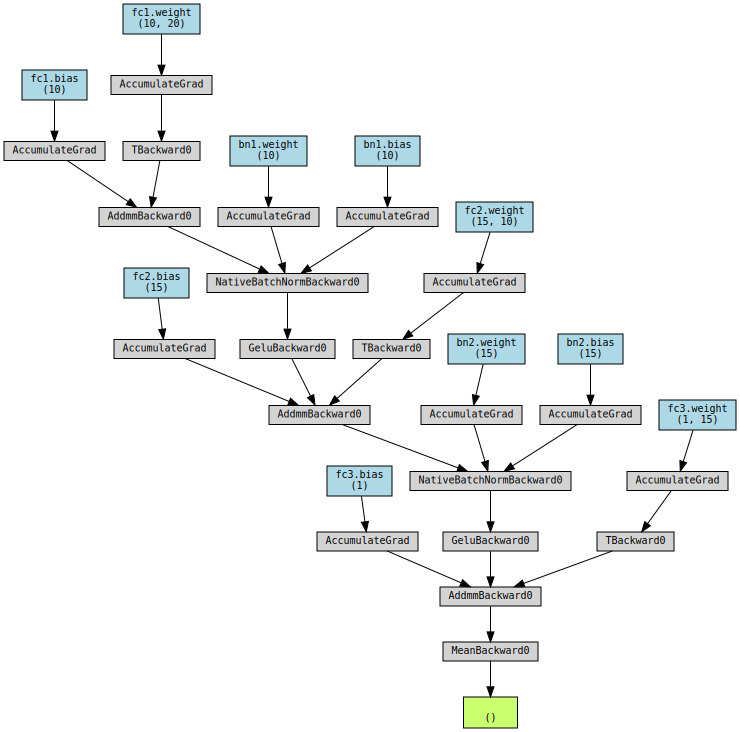

In [42]:
class NN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(20, 10)
        self.bn1 = nn.BatchNorm1d(10)
        self.fc2 = nn.Linear(10, 15)
        self.bn2 = nn.BatchNorm1d(15)
        self.fc3 = nn.Linear(15, 1)


        # self.linear_layer1 = nn.Sequential(
        #     nn.Linear(in_features=20, out_features=10),
        #     nn.BatchNorm1d(10),
        #     nn.ReLU(),
        # )
        # self.linear_layer2 = nn.Sequential(
        #     nn.Linear(in_features=10, out_features=15),
        #     nn.ReLU(),
        #     nn.BatchNorm1d(15),
        #     nn.Linear(15, 1)
        # )


        self.my_buffer_1 = self.register_buffer("A", torch.zeros(3,3))

    def forward(self, x):
        # output = self.linear_layer1(x)
        # output = self.linear_layer2(output)
        # return output
        output = self.bn1(self.fc1(x))
        output = nn.GELU()(output)
        output = self.bn2(self.fc2(output))
        output = nn.GELU()(output)
        return self.fc3(output)

    
x = torch.randn(10, 20)    
model = NN()
y = model(x)

make_dot(y.mean(), dict(model.named_parameters()))



In [ ]:
list(model.named_buffers())

In [ ]:
model.state_dict()